In [3]:
# import the libraries
!pip install pandas_datareader pandas --upgrade
import yfinance as yf
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




In [4]:
# Read the Excel file into a DataFrame
df = pd.read_excel("/content/ahluwaliaepspe.xlsx")

FileNotFoundError: ignored

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(16,8))
plt.title ('EPS')
plt.plot(df['EPS'])
plt.xlabel('Slot Date', fontsize=18)
plt.ylabel('EPS Rs (₹)', fontsize=18)
plt.show()


In [ ]:
# create a new data frame with only the close column
data = df.filter(['EPS'])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len
# Scale the data (preprocessing, normalizing/scaling the data)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()
x_train, y_train =np.array(x_train), np.array(y_train)
# Reshape the data,because LSTM requires inputs to be in 3-dim(no.of samples,no.of time stamps, no.of features) and right now our data is in 2-dim
 #x_train.shape # we will only get 2-dim (rows,columns)
# now convert the array to 3-dim
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1)) #no. of rows, no.columns, closing price
x_train.shape
#Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=2)


In [ ]:
#create the testing data set
#create a new array containing scaled values from index 2047 to 2507
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # all the values that we want our model to predict, actual test values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  # these values are not scaled, they are the original data
# Convert the data to a numpy array
x_test = np.array(x_test)
#Reshape the data (from 2-dim to 3-dim)
x_test =np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1)) #No.of rows,no.of columns,no.of features
# get the model's predicted price values (we want predicitions based on the x_test dataset)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # we want predictions to contain the same values as our y_test data set contains
# we are unscaling the values
# get the root mean squared error (RMSE) lower value indicates a better fit
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('EPS INR', fontsize=18)
plt.plot(train['EPS'])
plt.plot(valid[['EPS', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [ ]:
valid['Error Godrej'] = ((valid['Predictions'] - valid['EPS']) / valid['EPS']) * 100
valid
average = valid['Error Godrej'].mean()

# Print the average
print("Average:", average)



[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01   62.599998   64.000000   62.366665   62.900002   56.521893   
2013-01-02   63.466667   66.333336   63.200001   65.699997   59.037968   
2013-01-03   66.099998   67.800003   65.733330   66.300003   59.577129   
2013-01-04   66.599998   68.000000   65.366669   66.433334   59.696934   
2013-01-07   66.766663   68.300003   65.699997   66.366669   59.637032   
...                ...         ...         ...         ...         ...   
2023-09-14  620.299988  624.349976  612.299988  617.299988  617.299988   
2023-09-15  625.000000  625.000000  610.049988  619.849976  619.849976   
2023-09-18  624.849976  634.000000  603.000000  609.700012  609.700012   
2023-09-20  603.049988  613.700012  582.400024  585.700012  585.700012   
2023-09-21  585.000000  592.900024  575.200

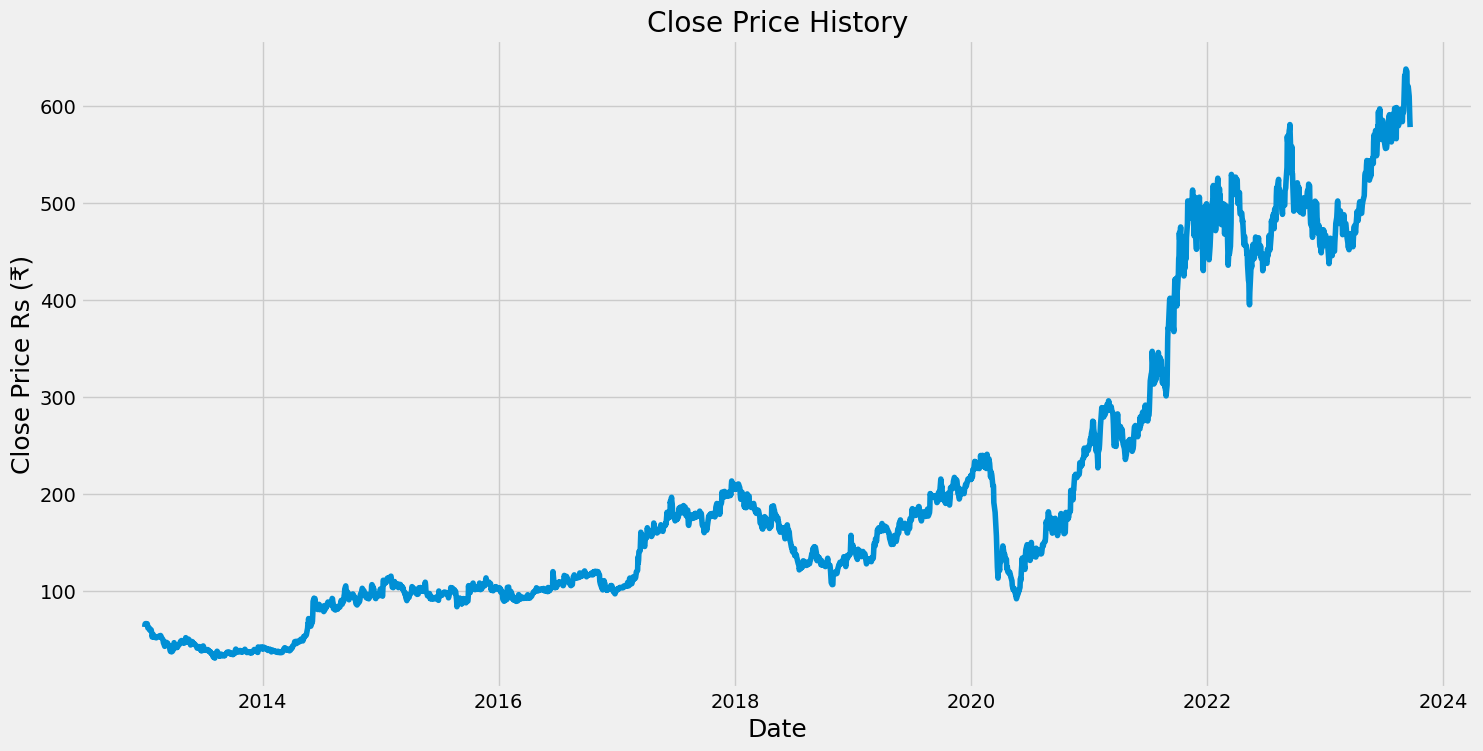

In [5]:
stock_symbol = 'BRIGADE.NS'

# Define the date range
start_date = '2013-01-01'
end_date = '2023-09-22'

# Fetch the stock data
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the data
print(df)
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title ('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rs (₹)', fontsize=18)
plt.show()



In [6]:
# create a new data frame with only the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len
# Scale the data (preprocessing, normalizing/scaling the data)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()
#convert the x_train and y_train to numpy array, so that we can now use them to train the model
x_train, y_train =np.array(x_train), np.array(y_train)
# Reshape the data,because LSTM requires inputs to be in 3-dim(no.of samples,no.of time stamps, no.of features) and right now our data is in 2-dim
 #x_train.shape # we will only get 2-dim (rows,columns)
# now convert the array to 3-dim
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1)) #no. of rows, no.columns, closing price
x_train.shape
#Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=2)



[array([0.0527877 , 0.05740181, 0.05839056, 0.05861027, 0.05850041,
       0.05806097, 0.05817083, 0.05503982, 0.05108486, 0.05053557,
       0.05130459, 0.04828343, 0.04932711, 0.0472947 , 0.04800879,
       0.04487778, 0.04317495, 0.03581433, 0.03790167, 0.03976929,
       0.03674814, 0.03559462, 0.0357594 , 0.03531996, 0.03488053,
       0.03455094, 0.03449602, 0.03592419, 0.03636364, 0.03663828,
       0.0364735 , 0.03630871, 0.03685801, 0.03696786, 0.03663828,
       0.03845098, 0.03779181, 0.03548476, 0.03488053, 0.03251854,
       0.03180444, 0.02960725, 0.02570722, 0.0249382 , 0.01999451,
       0.02224663, 0.02691568, 0.02702554, 0.02702554, 0.02625652,
       0.02477342, 0.02202692, 0.02422411, 0.02092831, 0.02037902,
       0.01867619, 0.01477616, 0.01241417, 0.01120571, 0.01153529])]
[0.010766275092557669]

Epoch 1/2
2058/2058 [==============================] - 36s 16ms/step - loss: 4.8151e-04
Epoch 2/2
2058/2058 [==============================] - 33s 16ms/step - loss: 1.85

In [7]:
#create the testing data set
#create a new array containing scaled values from index 2047 to 2507
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # all the values that we want our model to predict, actual test values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  # these values are not scaled, they are the original data
# Convert the data to a numpy array
x_test = np.array(x_test)
#Reshape the data (from 2-dim to 3-dim)
x_test =np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1)) #No.of rows,no.of columns,no.of features
# get the model's predicted price values (we want predicitions based on the x_test dataset)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # we want predictions to contain the same values as our y_test data set contains
# we are unscaling the values
# get the root mean squared error (RMSE) lower value indicates a better fit
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


17/17 [==============================] - 1s 9ms/step


15.18236956588139

<ipython-input-8-e066e84d13c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


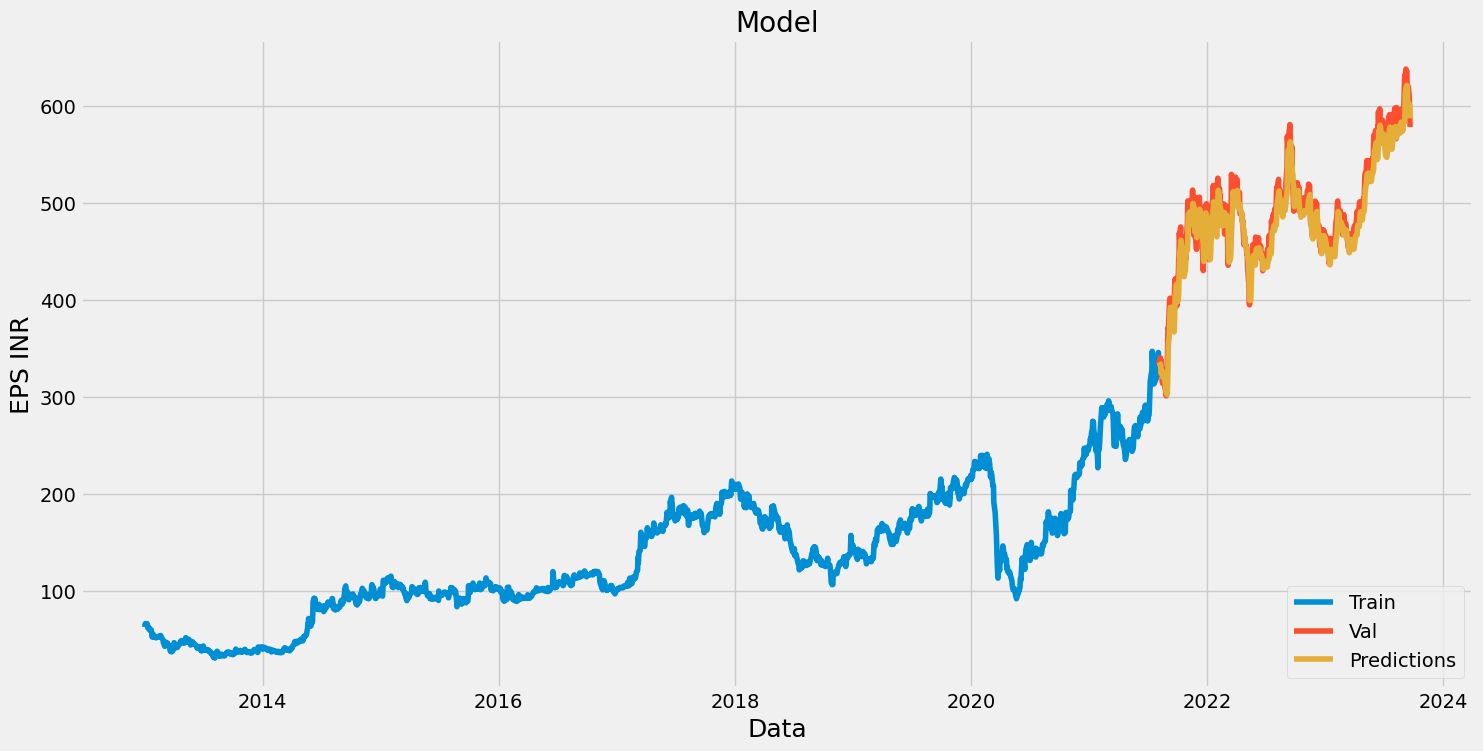

In [8]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('EPS INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [9]:
valid['Error Godrej'] = ((valid['Predictions'] - valid['Close']) / valid['Close']) * 100
valid

<ipython-input-9-05976a732f56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Error Godrej'] = ((valid['Predictions'] - valid['Close']) / valid['Close']) * 100


Close  Predictions  Error Godrej
Date                                             
2021-08-05  336.799988   335.654877     -0.339997
2021-08-06  334.500000   335.073669      0.171501
2021-08-09  340.250000   332.865753     -2.170242
2021-08-10  328.100006   333.230743      1.563772
2021-08-11  323.250000   329.368134      1.892694
...                ...          ...           ...
2023-09-14  617.299988   600.164917     -2.775809
2023-09-15  619.849976   599.418762     -3.296155
2023-09-18  609.700012   601.932129     -1.274050
2023-09-20  585.700012   599.829651      2.412436
2023-09-21  577.900024   586.950317      1.566066

[529 rows x 3 columns]

In [10]:
import datetime

# Calculate the date for tomorrow
today = datetime.date.today()
tomorrow = today - datetime.timedelta(days=1)
tomorrow_str = tomorrow.strftime('%Y-%m-%d')

# Fetch the data for the next day
next_day_data = yf.download(stock_symbol, start=tomorrow_str, end=tomorrow_str)

# Extend your dataset by one day with the data for tomorrow
extended_data = pd.concat([df, next_day_data])

# Scale the extended data
extended_scaled_data = scaler.transform(extended_data[['Close']])

# Create an input sequence for the next day prediction
last_60_days = extended_scaled_data[-60:]
x_input = np.reshape(last_60_days, (1, 60, 1))

# Use the model to predict the closing price for tomorrow
predicted_closing_price = model.predict(x_input)

# Inverse transform the predicted value to get the actual closing price
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

# Print the predicted closing price for tomorrow
print("Predicted Closing Price for Tomorrow:", predicted_closing_price[0][0])


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 17ms/step
Predicted Closing Price for Tomorrow: 565.2482


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [11]:
import datetime

# Initialize a variable to store the predicted prices for the next week
predicted_prices_week = []

# Calculate the date for tomorrow
today = datetime.date.today()

# Iterate for the next 7 days to make predictions
for _ in range(7):
    # Calculate the date for the next day
    next_day = today + datetime.timedelta(days=1)
    next_day_str = next_day.strftime('%Y-%m-%d')

    # Fetch the data for the next day
    next_day_data = yf.download(stock_symbol, start=next_day_str, end=next_day_str)

    # Extend your dataset by one day with the data for the next day
    extended_data = pd.concat([df, next_day_data])

    # Scale the extended data
    extended_scaled_data = scaler.transform(extended_data[['Close']])

    # Create an input sequence for the next day prediction
    last_60_days = extended_scaled_data[-60:]
    x_input = np.reshape(last_60_days, (1, 60, 1))

    # Use the model to predict the closing price for the next day
    predicted_closing_price = model.predict(x_input)

    # Inverse transform the predicted value to get the actual closing price
    predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

    # Append the predicted closing price to the list
    predicted_prices_week.append(predicted_closing_price[0][0])

    # Update the current date for the next iteration
    today = next_day

# Print the predicted closing prices for the next week
print("Predicted Closing Prices for the Next Week:")
for i, price in enumerate(predicted_prices_week):
    print(f"Day {i+1}: {price}")


[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRIGADE.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1695580200, endDate = 1695580200")



1/1 [==============================] - 0s 19ms/step
[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

<ipython-input-11-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

1/1 [==============================] - 0s 18ms/step
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRIGADE.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1695753000, endDate = 1695753000")



1/1 [==============================] - 0s 16ms/step
[*********************100%%**********************]  1 of 1 completed

<ipython-input-11-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

<ipython-input-11-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

1/1 [==============================] - 0s 17ms/step
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRIGADE.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1695925800, endDate = 1695925800")


<ipython-input-11-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

1/1 [==============================] - 0s 20ms/step
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRIGADE.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1696012200, endDate = 1696012200")


<ipython-input-11-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

1/1 [==============================] - 0s 20ms/step
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRIGADE.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1696098600, endDate = 1696098600")


<ipython-input-11-6108351a5785>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

1/1 [==============================] - 0s 18ms/step
Predicted Closing Prices for the Next Week:
Day 1: 574.3056030273438
Day 2: 574.3056030273438
Day 3: 574.3056030273438
Day 4: 574.3056030273438
Day 5: 574.3056030273438
Day 6: 574.3056030273438
Day 7: 574.3056030273438


In [15]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Replace 'stock_symbol' with the actual stock symbol you want to predict
stock_symbol = 'AAPL'

# Initialize a variable to store the predicted prices for the next month
predicted_prices_month = []

# Calculate the date for tomorrow
today = datetime.date.today()

# Define the number of days in one month (approximately 30 days)
num_days_in_month = 30

# Initialize a scaler for data transformation
scaler = MinMaxScaler()

# Fetch historical data
df = yf.download(stock_symbol, start=(today - datetime.timedelta(days=num_days_in_month)).strftime('%Y-%m-%d'),
                 end=today.strftime('%Y-%m-%d'))

# Scale the historical data
scaled_data = scaler.fit_transform(df[['Close']])

# Iterate for the next month to make predictions
for _ in range(num_days_in_month):
    # Calculate the date for the next day
    next_day = today + datetime.timedelta(days=1)
    next_day_str = next_day.strftime('%Y-%m-%d')

    # Fetch the data for the next day
    next_day_data = yf.download(stock_symbol, start=next_day_str, end=next_day_str)

    # Extend your dataset by one day with the data for the next day
    extended_data = pd.concat([df, next_day_data])

    # Scale the extended data
    extended_scaled_data = scaler.transform(extended_data[['Close']])

    # Create an input sequence for the next day prediction
    last_60_days = extended_scaled_data[-60:]
    x_input = np.reshape(last_60_days, (1, 60, 1))

    # Use the model to predict the closing price for the next day
    predicted_closing_price = model.predict(x_input)

    # Inverse transform the predicted value to get the actual closing price
    predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

    # Append the predicted closing price to the list
    predicted_prices_month.append(predicted_closing_price[0][0])

    # Update the current date for the next iteration
    today = next_day

# Print the predicted closing prices for the next month
print("Predicted Closing Prices for the Next Month:")
for i, price in enumerate(predicted_prices_month):
    print(f"Day {i+1}: {price}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

<ipython-input-15-a77a84d5cac0>:39: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  extended_data = pd.concat([df, next_day_data])
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a futur

ValueError: ignored